### Isolation Forest Anomaly Detection


In [1]:
# Step 1 Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest

In [2]:
# Step 2 Load Dataset 
df = pd.read_csv('healthcare.csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


In [3]:
df.shape

(250, 2)

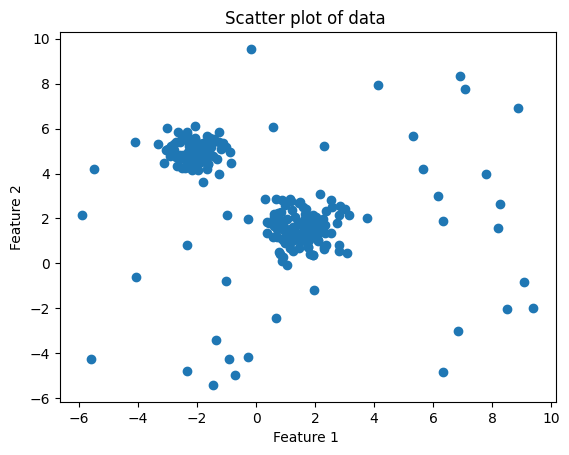

In [4]:
# Step 3 : Visualize the data 
# Scatter plot of the first two columns 
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.title("Scatter plot of data ")
plt.xlabel("Feature 1 ")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# Step 4 : Create and train Isolation Forest 
# contamination =0.2 means we expect ~20% of points to be anomalies 
clf = IsolationForest(contamination = 0.2)
clf.fit(df)

,n_estimators,100
,max_samples,'auto'
,contamination,0.2
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,None
,verbose,0
,warm_start,False


In [6]:
# Step 5 Make Prediction
# Prediction output : 1 == normal, -1 == anomaly
predictions = clf.predict(df)
print(predictions)

[ 1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
 -1 -1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1
 -1  1 -1  1  1  1 -1  1  1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1
  1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1
  1  1  1  1  1  1 -1  1  1  1 -1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1
  1 -1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1 -1 -1  1]


In [7]:
len(predictions)

250

In [8]:
# Step 6 : Find the indices of anomalies 
anomaly_index = np.where(predictions == -1)
print(anomaly_index)

(array([  4,  20,  24,  31,  45,  48,  49,  53,  55,  61,  63,  67,  72,
        74,  78,  83,  85,  87,  89,  92,  97, 104, 108, 114, 119, 126,
       130, 132, 133, 141, 151, 160, 167, 177, 179, 182, 187, 197, 199,
       204, 209, 212, 214, 217, 220, 221, 227, 242, 247, 248]),)


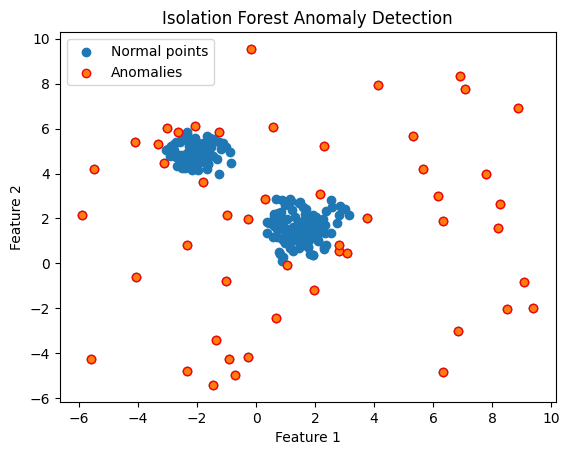

In [9]:
# Step 7 : Visualize the anomalies on the scatter plot
x = df.values # convert dataframe to Numpy array for indexing 
plt.scatter(df.iloc[:,0],df.iloc[:,1],label = "Normal points")
plt.scatter(x[anomaly_index, 0], x[anomaly_index, 1], edgecolors="r", label="Anomalies")  # Red points
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()